# User Engagement Analysis

In [2]:
#importing libraries for this operation
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from statistics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
# packages for path locations
import os
import sys
# package scripts in the script module folder 
sys.path.insert(0,'../scripts/')

In [4]:
df = pd.read_csv('../data/cleaned_telecom_data.csv')
df.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,...,47.0,1823652.0,1.823653e+09,76411.0,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,...,70.0,1365104.0,1.365104e+09,3728.0,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,...,70.0,1361762.0,1.361763e+09,0.0,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,...,70.0,1321509.0,1.321510e+09,41212.0,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,...,70.0,1089009.0,1.089009e+09,0.0,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


Track user engagement using:
- sessions frequency
- the duration of the session
- the sessions total traffic

In [5]:
df['sessions frequency'] = df.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')

In [6]:
df_new = df[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [7]:
df_new.head(10)

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
0,3.360100e+10,5.173738e+14,1823652.0,1
1,3.360100e+10,1.234090e+15,1365104.0,1
2,3.360100e+10,7.183836e+14,1361762.0,1
3,3.360101e+10,1.638393e+15,1321509.0,1
4,3.360101e+10,1.158391e+15,1089009.0,2
5,3.360101e+10,1.439738e+15,1074638.0,2
6,3.360101e+10,9.221408e+14,1035261.0,2
7,3.360101e+10,1.371765e+15,951292.0,1
8,3.360101e+10,1.076896e+15,941634.0,2
9,3.360102e+10,9.378444e+14,864482.0,1


Aggregate the above metrics per customer id (MSISDN)

In [8]:
df_new.describe()

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
count,8.747000e+03,8.747000e+03,8.747000e+03,8747.000000
mean,3.361112e+10,9.163393e+14,7.288751e+04,1.339088
std,4.828190e+06,3.419210e+14,6.458303e+04,0.718915
min,3.360100e+10,8.990077e+13,2.729400e+04,1.000000
25%,3.360785e+10,6.687916e+14,4.739150e+04,1.000000
50%,3.361164e+10,9.155821e+14,6.294300e+04,1.000000
75%,3.361510e+10,1.163781e+15,8.639900e+04,2.000000
max,3.361867e+10,1.762451e+15,1.823652e+06,17.000000


# Top 10 customers on duration of session

In [9]:
# Top 10 customers on duration of session
df_new.sort_values(by='Dur. (ms)',ascending=False, inplace=True, ignore_index=True)
TopDuration = df_new[['MSISDN/Number', 'Dur. (ms)']].head(10)

In [10]:
TopDuration

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,1823652.0
1,3.360100e+10,1365104.0
2,3.360100e+10,1361762.0
3,3.360101e+10,1321509.0
4,3.360101e+10,1089009.0
5,3.360101e+10,1074638.0
6,3.360101e+10,1035261.0
7,3.360101e+10,951292.0
8,3.360101e+10,941634.0
9,3.360102e+10,889834.0


# Top 10 customers on session frequency

In [11]:
# Top 10 customers on session frequency
df_new.sort_values(by='sessions frequency', ascending=False, inplace=True, ignore_index=True)
TopSessionfrq = df_new[['MSISDN/Number', 'sessions frequency']].head(10)

In [12]:
TopSessionfrq

,MSISDN/Number,sessions frequency
0,3.361489e+10,17
1,3.360313e+10,12
2,3.360452e+10,12
3,3.360657e+10,9
4,3.360658e+10,9
5,3.361644e+10,7
6,3.361471e+10,7
7,3.360852e+10,7
8,3.361140e+10,7
9,3.360816e+10,7


# Normalizing selected columns
# Before Normalizing

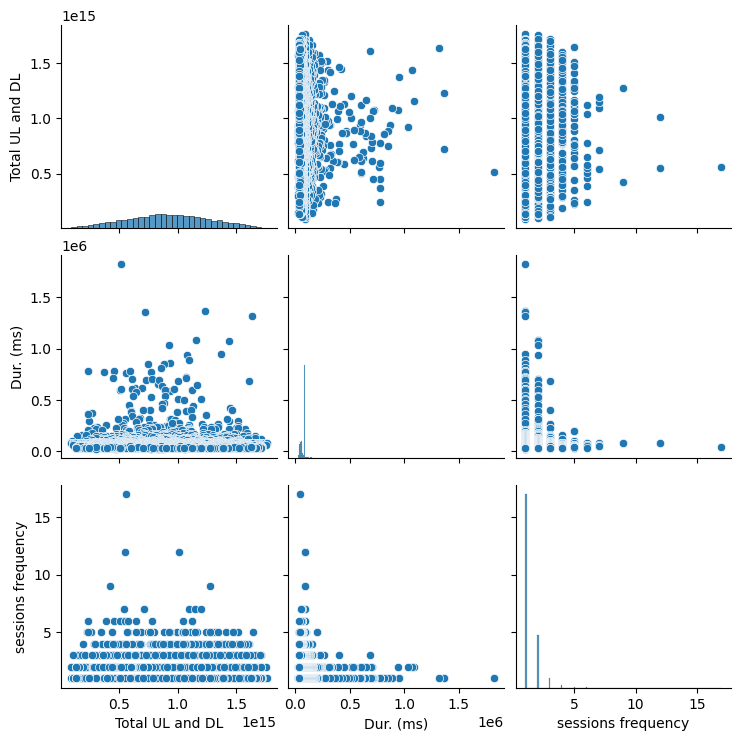

In [13]:
sns.pairplot(df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']])

In [14]:
df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']].describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,8.747000e+03,8.747000e+03,8747.000000
mean,9.163393e+14,7.288751e+04,1.339088
std,3.419210e+14,6.458303e+04,0.718915
min,8.990077e+13,2.729400e+04,1.000000
25%,6.687916e+14,4.739150e+04,1.000000
50%,9.155821e+14,6.294300e+04,1.000000
75%,1.163781e+15,8.639900e+04,2.000000
max,1.762451e+15,1.823652e+06,17.000000


# Normalization

In [15]:
normalize_column_df = pd.DataFrame(df['Total UL and DL'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['Total UL and DL'] = scaled_values

In [16]:
normalize_column_df = pd.DataFrame(df['Dur. (ms)'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['Dur. (ms)'] = scaled_values

In [17]:
normalize_column_df = pd.DataFrame(df['sessions frequency'])
normalize_column_values = normalize_column_df.values
normalizer = MinMaxScaler()
scaled_values = normalizer.fit_transform(normalize_column_values)
df['sessions frequency'] = scaled_values

# After Normalization

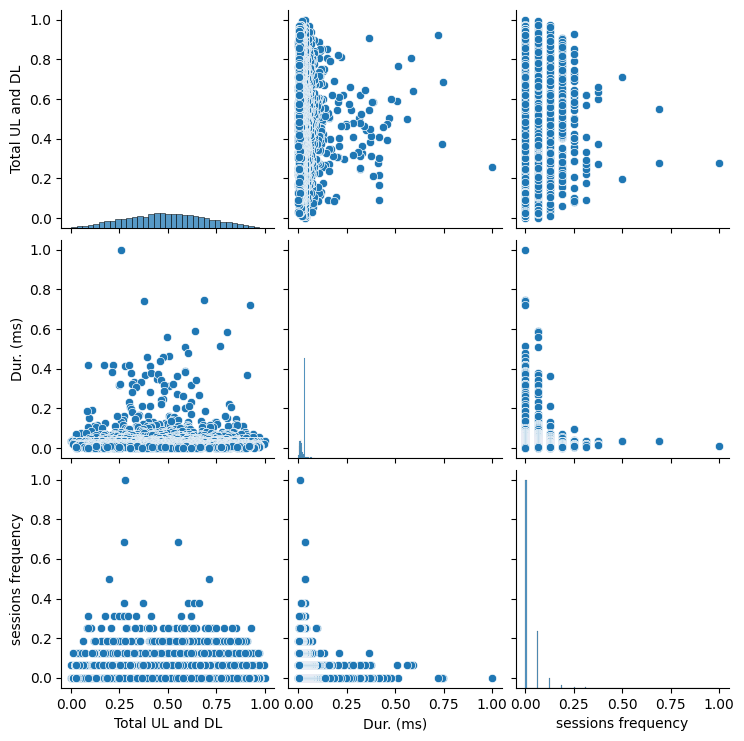

In [18]:
sns.pairplot(df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']])

In [19]:
df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']].describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,8747.000000,8747.000000,8747.000000
mean,0.494119,0.025381,0.021193
std,0.204431,0.035952,0.044932
min,0.000000,0.000000,0.000000
25%,0.346113,0.011188,0.000000
50%,0.493666,0.019845,0.000000
75%,0.642061,0.032903,0.062500
max,1.000000,1.000000,1.000000


# Standardizing selected columns

In [20]:
df2 = pd.read_csv('../data/cleaned_telecom_data.csv')

In [21]:
df2['sessions frequency'] = df2.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')

In [22]:
df2_new = df2[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [24]:
standardized_df = pd.DataFrame(df2['Total UL and DL'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['Total UL and DL'] = std_data

In [25]:
standardized_df = pd.DataFrame(df2['Dur. (ms)'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['Dur. (ms)'] = std_data

In [26]:
standardized_df = pd.DataFrame(df2['sessions frequency'])
std_column_values = standardized_df.values
sta = StandardScaler()
std_data = sta.fit_transform(std_column_values)
df2['sessions frequency'] = std_data

In [27]:
df2_new = df2[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [28]:
df2_new.head()

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
0,3.360100e+10,-1.166902,27.110287,-0.471693
1,3.360100e+10,0.929362,20.009750,-0.471693
2,3.360100e+10,-0.578985,19.958000,-0.471693
3,3.360101e+10,2.111875,19.334689,-0.471693
4,3.360101e+10,0.707957,15.734467,0.919372


In [29]:
df2_new.index = df2_new['MSISDN/Number']
df2_new = df2_new.iloc[:,1:4]

In [30]:
df2_new.head()

,Total UL and DL,Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-1.166902,27.110287,-0.471693
3.360100e+10,0.929362,20.009750,-0.471693
3.360100e+10,-0.578985,19.958000,-0.471693
3.360101e+10,2.111875,19.334689,-0.471693
3.360101e+10,0.707957,15.734467,0.919372


# K-means

In [31]:
df_nor = df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [32]:
df_nor.head(10)

,Total UL and DL,Dur. (ms),sessions frequency
0,0.255582,1.000000,0.0000
1,0.684098,0.744735,0.0000
2,0.375763,0.742874,0.0000
3,0.925827,0.720466,0.0000
4,0.638839,0.591038,0.0625
5,0.807054,0.583037,0.0625
6,0.497588,0.561117,0.0625
7,0.766413,0.514373,0.0000
8,0.590114,0.508997,0.0625
9,0.506976,0.466047,0.0000


In [33]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_nor)
label = kmeans.predict(df_nor)

In [34]:
df_kclus = pd.DataFrame(df_nor)
df_kclus['clusters'] = label

In [35]:
df_kclus.head()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
0,0.255582,1.000000,0.0000,2
1,0.684098,0.744735,0.0000,1
2,0.375763,0.742874,0.0000,0
3,0.925827,0.720466,0.0000,1
4,0.638839,0.591038,0.0625,1


In [36]:
centroids = kmeans.cluster_centers_

In [37]:
centroids

array([[0.48760715, 0.02599561, 0.02072721],
       [0.73549966, 0.02412607, 0.02140476],
       [0.23937973, 0.02580007, 0.02168687]])

In [38]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

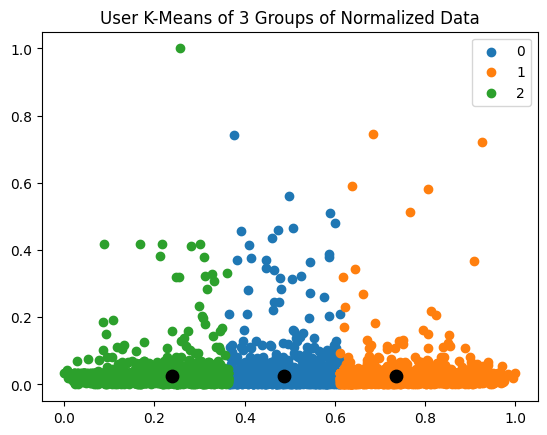

In [39]:
# plot
plt.title('User K-Means of 3 Groups of Normalized Data')
for i in u_labels:
    plt.scatter(df_nor[label == i].iloc[:,0] , df_nor[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

In [40]:
# forming cluster dataframe
cm = pd.DataFrame()
cm['index_d'] = df_nor.index.values
cm['cluster'] = kmeans.labels_

In [41]:
# cluster 1
nor_cluster1 = cm[cm.cluster == 0].iloc[:,0].values.tolist()
cluster_1_df = df_nor.loc[nor_cluster1,:]

In [42]:
# cluster 2
nor_cluster2 = cm[cm.cluster == 1].iloc[:,0].values.tolist()
cluster_2_df = df_nor.loc[nor_cluster2,:]

In [43]:
# cluster 3
nor_cluster3 = cm[cm.cluster == 2].iloc[:,0].values.tolist()
cluster_3_df = df_nor.loc[nor_cluster3,:]

# min, max and average values of the 3 clusters

In [44]:
cluster_1_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,3732.000000,3732.000000,3732.000000
mean,0.488073,0.026009,0.020733
std,0.069162,0.036122,0.041931
min,0.363528,0.000000,0.000000
25%,0.431298,0.011524,0.000000
50%,0.487267,0.020465,0.000000
75%,0.546919,0.032903,0.062500
max,0.611580,0.742874,0.687500


In [45]:
cluster_2_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,2617.000000,2617.000000,2617.000000
mean,0.735879,0.024126,0.021446
std,0.090051,0.033996,0.043819
min,0.611473,0.000675,0.000000
25%,0.659528,0.011001,0.000000
50%,0.718286,0.019010,0.000000
75%,0.799950,0.032903,0.062500
max,1.000000,0.744735,0.500000


In [46]:
cluster_3_df.describe()

,Total UL and DL,Dur. (ms),sessions frequency
count,2398.000000,2398.000000,2398.000000
mean,0.239689,0.025773,0.021633
std,0.086955,0.037702,0.050335
min,0.000000,0.000099,0.000000
25%,0.178968,0.011063,0.000000
50%,0.254640,0.019853,0.000000
75%,0.312751,0.032903,0.062500
max,0.363396,1.000000,1.000000


# non-normalized metrics

In [47]:
df_beforN = pd.read_csv('../data/cleaned_telecom_data.csv')

In [48]:
df_beforN['sessions frequency'] = df_beforN.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')

In [49]:
df_Bnew = df_beforN[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [50]:
df_Bnew.head()

,Total UL and DL,Dur. (ms),sessions frequency
0,5.173738e+14,1823652.0,1
1,1.234090e+15,1365104.0,1
2,7.183836e+14,1361762.0,1
3,1.638393e+15,1321509.0,1
4,1.158391e+15,1089009.0,2


In [51]:
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_Bnew)
label = kmeans.predict(df_Bnew)

In [52]:
df_kclus = pd.DataFrame(df_Bnew)
df_kclus['clusters'] = label

In [53]:
df_kclus.head()

,Total UL and DL,Dur. (ms),sessions frequency,clusters
0,5.173738e+14,1823652.0,1,2
1,1.234090e+15,1365104.0,1,1
2,7.183836e+14,1361762.0,1,0
3,1.638393e+15,1321509.0,1,1
4,1.158391e+15,1089009.0,2,1


In [54]:
centroids = kmeans.cluster_centers_

In [55]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

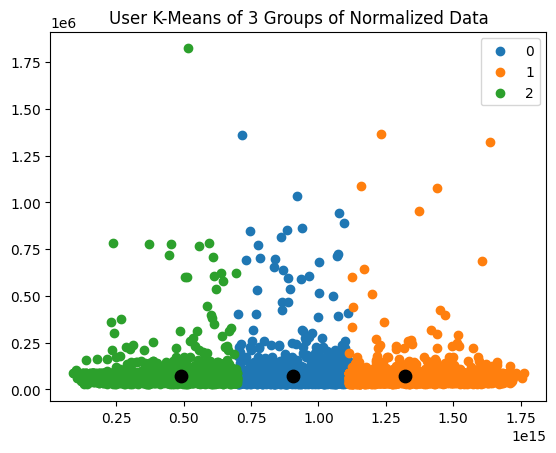

In [56]:
# plot
plt.title('User K-Means of 3 Groups of Normalized Data')
for i in u_labels:
    plt.scatter(df_Bnew[label == i].iloc[:,0] , df_Bnew[label == i].iloc[:,1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.legend()
plt.show()

# Aggregation of user total traffic per application

In [57]:
df_agg = pd.read_csv('../data/cleaned_telecom_data.csv')

In [58]:
df_agg.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,...,47.0,1823652.0,1.823653e+09,76411.0,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9164566995485190,2.082014e+14,3.552121e+13
1,3.360100e+10,1,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,...,70.0,1365104.0,1.365104e+09,3728.0,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,...,70.0,1361762.0,1.361763e+09,0.0,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,...,70.0,1321509.0,1.321510e+09,41212.0,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,...,70.0,1089009.0,1.089009e+09,0.0,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


# Top 10 Youtube users

In [59]:
# sort Youtube_total_data to get the most engaged users in the app
df_agg.sort_values(by=['Youtube_Total_Data'],ascending=False, inplace=True)
top10_youtube_user=df_agg[['MSISDN/Number', 'Youtube_Total_Data']].head(10)
top10_youtube_user.to_csv("../data/top10_youtube_users.csv",index=False)

In [60]:
top10_youtube_user

,MSISDN/Number,Youtube_Total_Data
1480,3.360566e+10,4.495095e+13
847,3.360343e+10,4.491711e+13
3358,3.361004e+10,4.491219e+13
6439,3.361489e+10,4.479873e+13
660,3.360312e+10,4.456184e+13
97,3.360119e+10,4.449670e+13
3000,3.360942e+10,4.449466e+13
1129,3.360391e+10,4.444949e+13
3994,3.361103e+10,4.429176e+13
6114,3.361440e+10,4.426724e+13


# Top 10 Google users

In [61]:
# sort Google to get the most engaged users in the app
df_agg.sort_values(by=['Google_Total_Data'],ascending=False, inplace=True)
top10_google_user=df_agg[['MSISDN/Number', 'Google_Total_Data']].head(10)
top10_google_user.to_csv("../data/top10_google_users.csv",index=False)

In [62]:
top10_google_user

,MSISDN/Number,Google_Total_Data
3297,3.360993e+10,1.550645e+13
8006,3.361747e+10,1.547589e+13
1996,3.360750e+10,1.538916e+13
1943,3.360739e+10,1.537450e+13
8091,3.361760e+10,1.535626e+13
4177,3.361134e+10,1.534634e+13
1118,3.360390e+10,1.534082e+13
1436,3.360551e+10,1.529321e+13
8123,3.361768e+10,1.525707e+13
3938,3.361093e+10,1.524942e+13


# Top 10 Email users

In [63]:
# sort Email_total_data to get the most engaged users in the app
df_agg.sort_values(by=['Email_Total_Data'],ascending=False, inplace=True)
top10_email_user=df_agg[['MSISDN/Number', 'Email_Total_Data']].head(10)
top10_email_user.to_csv("../data/top10_email_users.csv",index=False)

In [64]:
top10_email_user

,MSISDN/Number,Email_Total_Data
113,3.360122e+10,4.497701e+12
2647,3.360884e+10,4.491714e+12
5327,3.361320e+10,4.487592e+12
478,3.360233e+10,4.476497e+12
6802,3.361546e+10,4.474478e+12
5143,3.361287e+10,4.464823e+12
2363,3.360826e+10,4.459839e+12
5794,3.361390e+10,4.454945e+12
8656,3.361854e+10,4.452221e+12
8604,3.361846e+10,4.441442e+12


# Top 10 Social media users

In [65]:
# sort social media to get the most engaged users in the app
df_agg.sort_values(by=['Social_Media_Total_Data'],ascending=False, inplace=True)
top10_socialM_user=df_agg[['MSISDN/Number', 'Social_Media_Total_Data']].head(10)
top10_socialM_user.to_csv("../data/top10_socialMedia_users.csv",index=False)

In [66]:
top10_socialM_user

,MSISDN/Number,Social_Media_Total_Data
7417,3.361647e+10,3.647484e+12
4845,3.361236e+10,3.640677e+12
6034,3.361429e+10,3.639240e+12
3241,3.360985e+10,3.639152e+12
3761,3.361068e+10,3.638958e+12
627,3.360305e+10,3.636883e+12
7624,3.361677e+10,3.633501e+12
5060,3.361273e+10,3.632719e+12
166,3.360131e+10,3.629736e+12
909,3.360354e+10,3.629105e+12


# Top 10 Netflix users

In [67]:
# sort netflix to get the most engaged users in the app
df_agg.sort_values(by=['Netflix_Total_Data'],ascending=False, inplace=True)
top10_netflix_user=df_agg[['MSISDN/Number', 'Netflix_Total_Data']].head(10)
top10_netflix_user.to_csv("../data/top10_netflix_users.csv",index=False)

In [68]:
top10_netflix_user

,MSISDN/Number,Netflix_Total_Data
5081,3.361276e+10,4.490332e+13
2268,3.360805e+10,4.480843e+13
4682,3.361210e+10,4.478620e+13
1797,3.360707e+10,4.475367e+13
7679,3.361687e+10,4.470984e+13
4062,3.361114e+10,4.470288e+13
4743,3.361219e+10,4.456180e+13
6177,3.361448e+10,4.447333e+13
5365,3.361323e+10,4.444393e+13
5249,3.361307e+10,4.432174e+13


# Top 10 Game app users

In [69]:
# sort gameers to get the most engaged users in the app
df_agg.sort_values(by=['Gaming_Total_Data'],ascending=False, inplace=True)
top10_game_user=df_agg[['MSISDN/Number', 'Gaming_Total_Data']].head(10)
top10_game_user.to_csv("../data/top10_gameApp_users.csv",index=False)

In [70]:
top10_game_user

,MSISDN/Number,Gaming_Total_Data
2886,3.360923e+10,8.589021e+14
5104,3.361282e+10,8.564227e+14
2609,3.360876e+10,8.563577e+14
2963,3.360935e+10,8.553319e+14
1855,3.360719e+10,8.549740e+14
3577,3.361039e+10,8.545823e+14
5623,3.361363e+10,8.545136e+14
7699,3.361690e+10,8.544585e+14
7797,3.361703e+10,8.543547e+14
4158,3.361132e+10,8.542060e+14


# Top 10 Other activity users

In [71]:
# sort gameers to get the most engaged users in the app
df_agg.sort_values(by=['Other_Total_Data'],ascending=False, inplace=True)
top10_other_user=df_agg[['MSISDN/Number', 'Other_Total_Data']].head(10)
top10_other_user.to_csv("../data/top10_otherAct_users.csv",index=False)

In [72]:
top10_other_user

,MSISDN/Number,Other_Total_Data
6819,3.361549e+10,8.584707e+14
2283,3.360807e+10,8.583821e+14
8218,3.361783e+10,8.583565e+14
1724,3.360681e+10,8.571045e+14
7502,3.361658e+10,8.565594e+14
5054,3.361272e+10,8.563287e+14
2883,3.360923e+10,8.551139e+14
2823,3.360912e+10,8.549510e+14
6769,3.361542e+10,8.544350e+14
3656,3.361051e+10,8.541100e+14


# Most Used App's

In [73]:
df_agg.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
6819,3.361549e+10,1,3.749151e+13,1.663937e+15,1.701429e+15,9.837060e+12,7.152022e+12,2.928098e+12,2.741451e+12,1.225833e+13,...,33.0,54733.0,54733955.0,28295.0,121.0,Apple,Apple iPhone 6 (A1586),D50555A,2.082003e+14,3.592811e+13
2283,3.360807e+10,2,3.983072e+13,1.399962e+15,1.439793e+15,2.051635e+13,7.464869e+12,5.040570e+11,1.039560e+11,1.945890e+13,...,75.0,86399.0,86399882.0,749.0,25.0,Huawei,Huawei B528S-23A,T72098A,2.082017e+14,8.637690e+13
8218,3.361783e+10,3,5.357549e+13,1.452169e+15,1.505744e+15,2.298754e+13,5.564919e+12,3.161557e+12,2.873308e+12,1.748825e+13,...,39.0,37861.0,37861947.0,32582.0,117.0,Apple,Apple iPhone 6S (A1688),T72386A,2.082021e+14,3.561411e+13
1724,3.360681e+10,1,4.124400e+13,1.433404e+15,1.474648e+15,2.154952e+13,1.028263e+13,2.400236e+12,1.304101e+12,1.086667e+13,...,137.0,86399.0,86399921.0,1107004.0,21765.0,Huawei,Huawei B528S-23A,T21319B,2.082017e+14,8.637690e+13
7502,3.361658e+10,1,3.727727e+13,1.181638e+15,1.218915e+15,6.842232e+12,8.020139e+12,1.504322e+12,3.079810e+12,2.278470e+13,...,44.0,48468.0,48468939.0,1229536.0,20828.0,Apple,Apple iPhone 6 (A1549),L72024A,2.082019e+14,3.520151e+13


In [74]:
apps=df_agg[['Youtube_Total_Data','Google_Total_Data','Email_Total_Data',
                'Social_Media_Total_Data','Netflix_Total_Data','Gaming_Total_Data', 'Other_Total_Data']]

In [75]:
apps.head()

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data
6819,9.837060e+12,7.152022e+12,2.928098e+12,2.741451e+12,1.225833e+13,8.080411e+14,8.584707e+14
2283,2.051635e+13,7.464869e+12,5.040570e+11,1.039560e+11,1.945890e+13,5.333630e+14,8.583821e+14
8218,2.298754e+13,5.564919e+12,3.161557e+12,2.873308e+12,1.748825e+13,5.953119e+14,8.583565e+14
1724,2.154952e+13,1.028263e+13,2.400236e+12,1.304101e+12,1.086667e+13,5.711407e+14,8.571045e+14
7502,6.842232e+12,8.020139e+12,1.504322e+12,3.079810e+12,2.278470e+13,3.201243e+14,8.565594e+14


In [76]:
# sum of column values to get total data used
sum_column = apps.sum(axis=0)

In [77]:
df_app = pd.DataFrame({'Application':sum_column.index, 'Total Data used':sum_column.values})
df_app.sort_values(by=['Total Data used'],ascending=False, inplace=True)
df_apps = df_app.head(4)

In [78]:
df_apps

,Application,Total Data used
6,Other_Total_Data,3.766805e+18
5,Gaming_Total_Data,3.750787e+18
0,Youtube_Total_Data,1.970232e+17
4,Netflix_Total_Data,1.960113e+17


# Top 3 Frequently used apps are:

- Gaming Apps
- Netflix Apps
- Youtube Apps

In [79]:
df_apps.head()

,Application,Total Data used
6,Other_Total_Data,3.766805e+18
5,Gaming_Total_Data,3.750787e+18
0,Youtube_Total_Data,1.970232e+17
4,Netflix_Total_Data,1.960113e+17


In [80]:
i = df_apps[df_apps['Application'] == 'Other_Total_Data'].index

In [81]:
df_apps.drop(i, inplace=True)
df_apps

,Application,Total Data used
5,Gaming_Total_Data,3.750787e+18
0,Youtube_Total_Data,1.970232e+17
4,Netflix_Total_Data,1.960113e+17


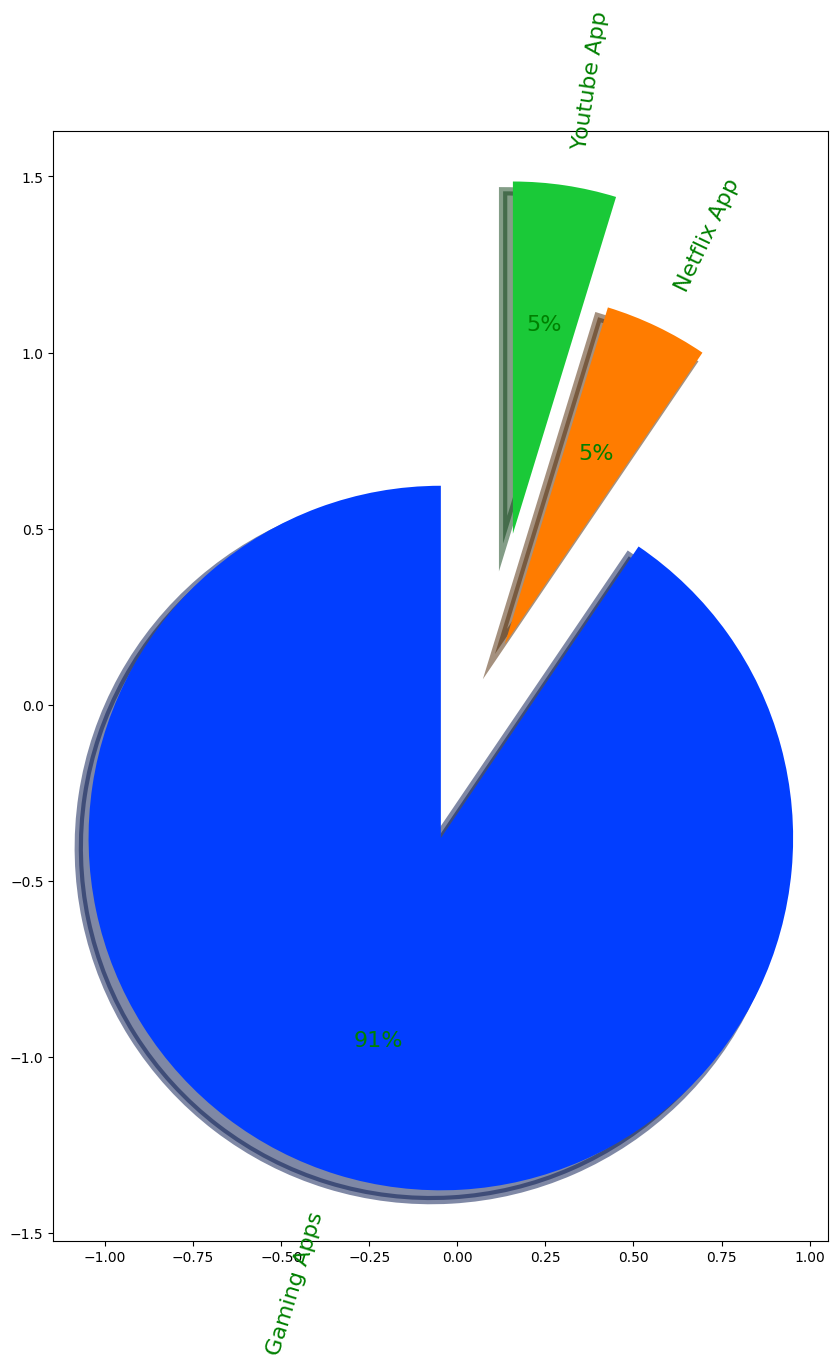

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df_apps['Total Data used'].tolist()
explode = [0.5,0.08,0.39]
labels = ['Gaming Apps', 'Netflix App', 'Youtube App']
colors = sns.color_palette('bright')
plt.figure(figsize=(10,30))
plt.pie(data,
        labels=labels,
        colors = colors,
        autopct = '%0.0f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'Green','fontsize':16},
        wedgeprops = {'linewidth': 6},
        frame = 'true' ,
        center = (0.1,0.1),
        rotatelabels = 'true')
plt.show()

# K-means for standardized data

In [83]:
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df2_new)
    sse.append(kmeans.inertia_)

In [87]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

6

In [88]:
kmeans = KMeans(init="random",n_clusters=kl.elbow,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(df2_new)
centroids = kmeans.cluster_centers_
#Getting index based on clusters
u_labels = np.unique(label)

In [89]:
df2_new['cluster'] = label
df2_new.to_csv('../data/engagement.csv')

In [90]:
df2_new.head()

,Total UL and DL,Dur. (ms),sessions frequency,cluster
MSISDN/Number,,,,
3.360100e+10,-1.166902,27.110287,-0.471693,1
3.360100e+10,0.929362,20.009750,-0.471693,1
3.360100e+10,-0.578985,19.958000,-0.471693,1
3.360101e+10,2.111875,19.334689,-0.471693,1
3.360101e+10,0.707957,15.734467,0.919372,1
